<a href="https://colab.research.google.com/github/afarley9/perovskites/blob/main/examples/data_loading_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This notebook is an example of how our data is being loaded from the Google Shared Drive by the team members.
## **Note that the training data is available only to the members to the team. So, only the team members can access the master index csv file.**

This is how Google colab's `mount` is being used to read data directly from the drive without downloading or uploading. By directly routing data to the Colab's virtual machine, we will be able stream line it directly into the neural network being built by other team folks.



In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys, pickle

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tqdm.keras import TqdmCallback
from sklearn.model_selection import train_test_split

# Mount the drive and clone the github repo
drive.mount('/content/drive/')
!git clone https://github.com/afarley9/perovskites.git

# Import modules from the github repo
sys.path.append("/content/perovskites/perovskites")
import utils.image_processing as impr
import utils.image_loader as loader

MODEL_LOG_FILE = "drive/Shareddrives/Perovskites_DIRECT/tensorboard_logs"
MODEL_INFO = loader.MODEL_INFO
final_img_size = MODEL_INFO['target_image_size_pix']

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
fatal: destination path 'perovskites' already exists and is not an empty directory.


Import the packages from the cloned git repository where all the python codes are present.

In [2]:
dataset = loader.PLDataLoader()
X_train, X_test, y_train, y_test = dataset.train_test_split(test_size=0.2,
                                                            random_state=42,
                                                            shuffle=True)

All the paths to the relevant images and the corresponding experimental metadata are stored in a master csv file which lists details of **1,257 individual degradation experiments**. So this study is going to be done on a well-documented and experimentally collected dataset. But, the challenge is that since the data is experimentally collected and is prone to human-induced and other irreducible noise, it is required to undergo an extensive data-cleaning process to get reliable results. As used above, the `PLDataLoader()` can be used to load the data and also make the test-train splits. ***Note that the dataset is currently available only to the team members due to confidentiality of the data as most of it is unpublished***.


This is the part where we are creating a scope for TPU runtime. We create the model inside the `tpu_strategy.scope` after connecting to a **Google Cloud TPU**.

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

Tensorflow version 2.4.1
Running on TPU  ['10.7.171.162:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.7.171.162:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.7.171.162:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Now, create the sequential NN layers using `tf.keras.Sequential()` and train the CNN model using a TPU.

In [4]:
def create_model():
    model = Sequential([
                        layers.Conv2D(32, 3, padding='valid', use_bias=True,
                                    input_shape=(final_img_size,
                                                     final_img_size, 1),
                                    kernel_initializer='normal',
                                    activation='relu'),
                        layers.MaxPooling2D(),
                        layers.Conv2D(32, 3, padding='valid', use_bias=True,
                                      kernel_initializer='normal', activation='relu'),
                        layers.MaxPooling2D(),
                        layers.Conv2D(64, 3, padding='valid', use_bias=True,
                                      kernel_initializer='normal', activation='relu'),
                        layers.MaxPooling2D(),
                        layers.Flatten(),
                        layers.Dense(128, activation='relu',
                                    kernel_initializer='normal',
                                    use_bias=True, ),
                        layers.Dense(1, activation='linear',
                                    use_bias=True, )
                        ])

    model.compile(loss='mean_absolute_error', optimizer='nadam')
    return model

# Define callbacks
callbacks = [
    #tf.keras.callbacks.TensorBoard(log_dir=MODEL_LOG_FILE),
    TqdmCallback(verbose=0),
]

In [5]:
with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
    model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [6]:
from keras.models import model_from_json
from keras.models import load_model

# Training
epochs=1000
batch_size=25
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_test, y_test),
    callbacks=callbacks)

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()

with open("drive/Shareddrives/Perovskites_DIRECT/model_num.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("drive/Shareddrives/Perovskites_DIRECT/model_num.h5")

Epoch 1/1000
40/40 - 10s - loss: 355.4131 - val_loss: 443.4276
Epoch 2/1000
40/40 - 1s - loss: 344.2941 - val_loss: 453.0222
Epoch 3/1000
40/40 - 1s - loss: 343.6145 - val_loss: 441.0719
Epoch 4/1000
40/40 - 1s - loss: 347.1334 - val_loss: 437.3837
Epoch 5/1000
40/40 - 1s - loss: 343.6576 - val_loss: 440.5928
Epoch 6/1000
40/40 - 1s - loss: 343.0498 - val_loss: 447.8474
Epoch 7/1000
40/40 - 1s - loss: 341.7868 - val_loss: 442.9713
Epoch 8/1000
40/40 - 1s - loss: 343.3658 - val_loss: 436.9901
Epoch 9/1000
40/40 - 1s - loss: 343.9438 - val_loss: 436.4025
Epoch 10/1000
40/40 - 1s - loss: 340.8170 - val_loss: 436.2097
Epoch 11/1000
40/40 - 1s - loss: 341.8834 - val_loss: 437.2287
Epoch 12/1000
40/40 - 1s - loss: 340.8029 - val_loss: 435.2328
Epoch 13/1000
40/40 - 1s - loss: 339.3422 - val_loss: 448.0275
Epoch 14/1000
40/40 - 1s - loss: 348.0331 - val_loss: 436.1222
Epoch 15/1000
40/40 - 1s - loss: 338.8111 - val_loss: 438.3716
Epoch 16/1000
40/40 - 1s - loss: 338.8953 - val_loss: 436.5626


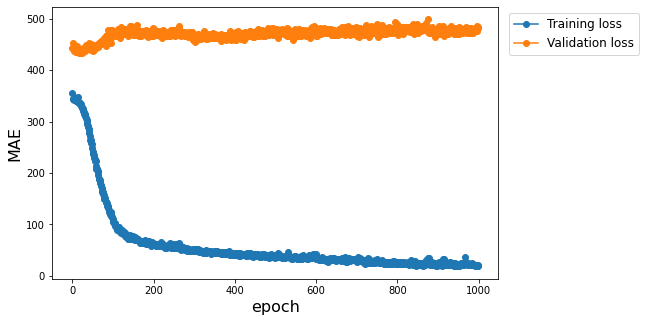

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(np.arange(epochs), history.history['loss'], 'o-',
         label='Training loss')
plt.plot(np.arange(epochs), history.history['val_loss'], 'o-',
         label='Validation loss')
plt.xlabel("epoch", fontsize=16)
plt.ylabel("MAE", fontsize=16)
plt.legend(bbox_to_anchor=(1.01,1), fontsize=12);